IMPORTING ALL TYHE NECESSARY LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

READING THE CSV FILE USING PANDAS

In [2]:
df = pd.read_csv("D://Titanic//Titny.csv")

In [3]:
df

PassengerId  Survived  Pclass  \
0            892         0       3   
1            893         1       3   
2            894         0       2   
3            895         0       3   
4            896         1       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                             Name     Sex   Age  SibSp  Parch  \
0                                Kelly, Mr. James    male  34.5      0      0   
1                Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                       Myles, Mr. Thomas Francis    male  62.0      0      0   
3                                Wirz, Mr. Albert    male  27.0      0      0   
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   
..                                            ...     ...   ...    ...    ...   
413                            Spector, Mr. Woolf    male   NaN      0      0   
414                  Oliva y Ocana, Dona. Fermina  female  39.0      0      0   
415                  Saether, Mr. Simon Sivertsen    male  38.5      0      0   
416                           Ware, Mr. Frederick    male   NaN      0      0   
417                      Peter, Master. Michael J    male   NaN      1      1   

                 Ticket      Fare Cabin Embarked  
0                330911    7.8292   NaN        Q  
1                363272    7.0000   NaN        S  
2                240276    9.6875   NaN        Q  
3                315154    8.6625   NaN        S  
4               3101298   12.2875   NaN        S  
..                  ...       ...   ...      ...  
413           A.5. 3236    8.0500   NaN        S  
414            PC 17758  108.9000  C105        C  
415  SOTON/O.Q. 3101262    7.2500   NaN        S  
416              359309    8.0500   NaN        S  
417                2668   22.3583   NaN        C  

[418 rows x 12 columns]

DATA ANALYSIS TO BE MADE IN FOLLOWING STEPS

In [4]:
df.head()

PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S

In [5]:
df.tail()

PassengerId  Survived  Pclass                          Name     Sex  \
413         1305         0       3            Spector, Mr. Woolf    male   
414         1306         1       1  Oliva y Ocana, Dona. Fermina  female   
415         1307         0       3  Saether, Mr. Simon Sivertsen    male   
416         1308         0       3           Ware, Mr. Frederick    male   
417         1309         0       3      Peter, Master. Michael J    male   

      Age  SibSp  Parch              Ticket      Fare Cabin Embarked  
413   NaN      0      0           A.5. 3236    8.0500   NaN        S  
414  39.0      0      0            PC 17758  108.9000  C105        C  
415  38.5      0      0  SOTON/O.Q. 3101262    7.2500   NaN        S  
416   NaN      0      0              359309    8.0500   NaN        S  
417   NaN      1      1                2668   22.3583   NaN        C

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [7]:
df.shape

(418, 12)

In [8]:
df[df.duplicated()]

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []

In [9]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

WE ARE DROPPING THE COLUMNS PASSENGERID,NAME,CABIN,TICKET AS THEY DO NOT CONTRIBUTE TO THE ANALYSIS

In [10]:
df.drop(['PassengerId','Name','Cabin','Ticket'],axis = 1,inplace = True)

In [11]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [12]:
for col in df[['Age','Fare']]:
    df[col] = df[col].fillna(df[col].mean())
    df[col] = df[col].astype('int')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  418 non-null    int64 
 1   Pclass    418 non-null    int64 
 2   Sex       418 non-null    object
 3   Age       418 non-null    int32 
 4   SibSp     418 non-null    int64 
 5   Parch     418 non-null    int64 
 6   Fare      418 non-null    int32 
 7   Embarked  418 non-null    object
dtypes: int32(2), int64(4), object(2)
memory usage: 23.0+ KB


<Axes: >

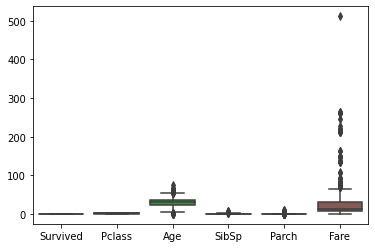

In [14]:
sns.boxplot(data = df)

ANALYSIS MADE
- IN THE AGE,SIBSP,PARCH,FARE COLUMN THERE ARE OUTLIERS PRESENT.
OUTLIERS TREATMENT USING IQR METHOD
IT INCLUDES 5 SUMMARY STATISTICS
- MIN VALUE
- 25%
- 50 %
-75%
-MAX VALUE

In [15]:
def remove_outliers(col):
    sorted(col)
    Q1 = np.percentile(col,25)
    Q3 = np.percentile(col,75)
    IQR = Q3 - Q1
    lower = Q1 - (1.5 * IQR)
    upper = Q3 + (1.5 * IQR)
    return lower,upper
for col in df[['Age','SibSp','Parch','Fare']]:
    lr,ur = remove_outliers(df[col])
    df[col] = np.where(df[col]<lr,lr,df[col])
    df[col] = np.where(df[col]>ur,ur,df[col])

<Axes: >

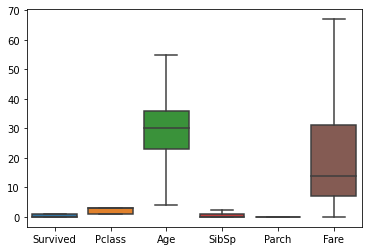

In [16]:
sns.boxplot(data = df)

LETS CHECK THE CO-RELATION BETWEEN DIFFERENT VARIABLES

In [17]:
corr = df.corr()
corr['Survived']

Survived    1.000000
Pclass     -0.108615
Age        -0.004952
SibSp       0.123638
Parch            NaN
Fare        0.201659
Name: Survived, dtype: float64

HERE PARCH IS NAN BECAUSE IT HAS ONLY 0 VALUES

<Axes: >

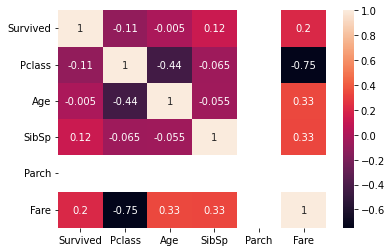

In [18]:
sns.heatmap(data = corr,annot = True)

AS THE COLUMNS SEX AND EMBARKED CONTRIBUTE TO THE ANALYSIS AND ITS DATATYPE IS OBJECT WE ARE USING LABEL ENCODER TO CONVERT IT INTO NUMERIC COLUMN AND ALSO CHANGING ITS DATATYPE.

In [19]:
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

Here I have taken x independent features only the specific columns 
and predicting whether the passenger survived or not.

In [20]:
x = df.drop('Survived',axis = 1)
y = df['Survived']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 1)

I HAVE BUILT A MODEL USING ALL THREE DIFFERENT ALGORITHMS  WHICH PROVES ALL THREE ARE EFFICIENT.

In [21]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

In [22]:
accuracy = accuracy_score(y_test,y_pred)
print(accuracy*100)

100.0


In [23]:
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       1.00      1.00      1.00        26

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print(accuracy*100)
report = classification_report(y_test,y_pred)
print(report)

100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       1.00      1.00      1.00        26

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
rt = RandomForestClassifier()
rt.fit(x_train,y_train)
y_pred = rt.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print(accuracy*100)
report = classification_report(y_test,y_pred)
print(report)

100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       1.00      1.00      1.00        26

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

